# Analysis 3 : analyse the variable

* merge the 2015 and 2016 rank country table and create a new column to show the change of the rank for each contry and out put to a new csv. 

In [1]:
import pandas as pd
# from pythainlp.segment import segment
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
# define the function to calculate and create the total score of happiness.
def getTotalScore(str):
    # load the data
    data = pd.read_csv(str)
    # get all the columns that to be added together
    colums = data.ix[:,2:]
    # add the new column named 'total score'
    # data['total score'] = colums.sum(axis = 1).head()
    data['total score'] = np.sum(colums,axis = 1)
    # return the data frame
    return data

In [3]:
data2015=getTotalScore('data/2015.csv')
data2016=getTotalScore('data/2016.csv')

In [4]:
#define the function to sort based on total score and add a new column named rank
def getRank(data):
    newData = data.sort_values(by='total score',ascending=False)
    newData['Rank'] = range(1,len(data) + 1)
    newData.index = range(0,len(data))
    return newData

In [5]:
data1 = getRank(data2015)
data2 = getRank(data2016)

In [7]:
data2.head()

,Country,Region,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,total score,Rank
0,Denmark,Western Europe,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,7.52560,1
1,Switzerland,Western Europe,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,7.50866,2
2,Iceland,Western Europe,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,7.50139,3
3,Norway,Western Europe,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,7.49758,4
4,Finland,Western Europe,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,7.41349,5


In [17]:
data3 = pd.concat([data1['Country'],data1['Region'],data1['Rank'],data1['total score']],axis=1)

In [18]:
data4 = pd.concat([data2['Country'],data2['Rank'],data2['total score']],axis=1)

In [20]:
# merge the data in year 2015 and 2016
data5 = data3.merge(data4, on = 'Country', how = 'inner')

In [21]:
data5.head()

,Country,Region,Rank_x,total score_x,Rank_y,total score_y
0,Switzerland,Western Europe,1,7.58696,2,7.50866
1,Iceland,Western Europe,2,7.56092,3,7.50139
2,Denmark,Western Europe,3,7.52708,1,7.52560
3,Norway,Western Europe,4,7.52222,4,7.49758
4,Canada,North America,5,7.42694,6,7.40403


In [23]:
data5['change'] = data5['Rank_y'] - data5['Rank_x']

In [25]:
data5.head()

,Country,Region,Rank_x,total score_x,Rank_y,total score_y,change
0,Switzerland,Western Europe,1,7.58696,2,7.50866,1
1,Iceland,Western Europe,2,7.56092,3,7.50139,1
2,Denmark,Western Europe,3,7.52708,1,7.52560,-2
3,Norway,Western Europe,4,7.52222,4,7.49758,0
4,Canada,North America,5,7.42694,6,7.40403,1


In [118]:
# sort the change according to the change of scores.
data6 = data5.sort_values(by='change',ascending=False)

In [119]:
data6.head()

,Country,Region,Rank_x,total score_x,Rank_y,total score_y,change
110,Liberia,Sub-Saharan Africa,116,4.57143,150,3.62171,34
76,Nigeria,Sub-Saharan Africa,78,5.26790,103,4.87531,25
21,Venezuela,Latin America and Caribbean,23,6.81021,44,6.08442,21
83,Zambia,Sub-Saharan Africa,85,5.12890,106,4.79533,21
73,Vietnam,Southeastern Asia,75,5.36036,96,5.06076,21


In [124]:
data6['change'].value_counts().head()

 1    14
 0    13
-2    11
-1    10
 2     9
Name: change, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

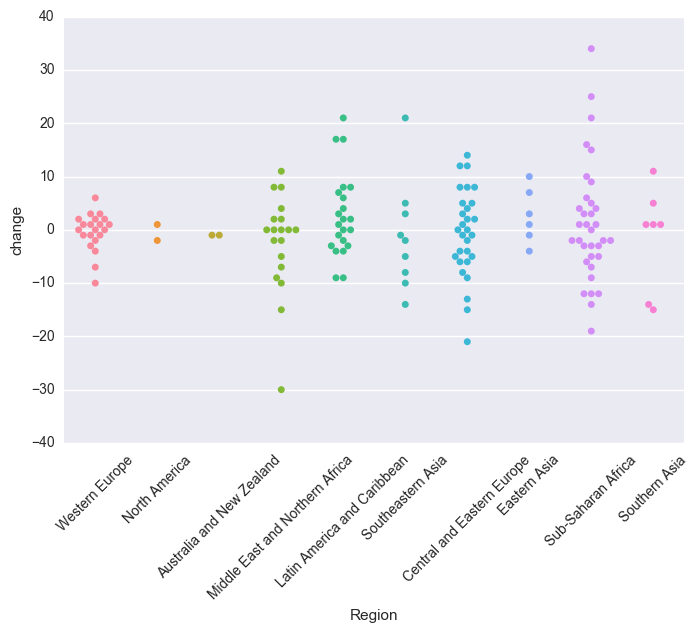

In [86]:
sns.set()
sns.swarmplot(x="Region", y="change",  data=data5)
plt.xticks(rotation=45)

In [192]:
data7['Trend'].value_counts()

increase    70
decrese     68
neutral     13
Name: Trend, dtype: int64

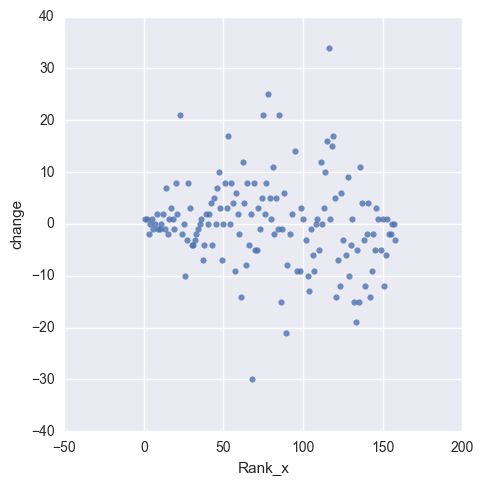

In [122]:
# Scatterplots
sns.lmplot('Rank_x', 'change', data=data6, fit_reg=False)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

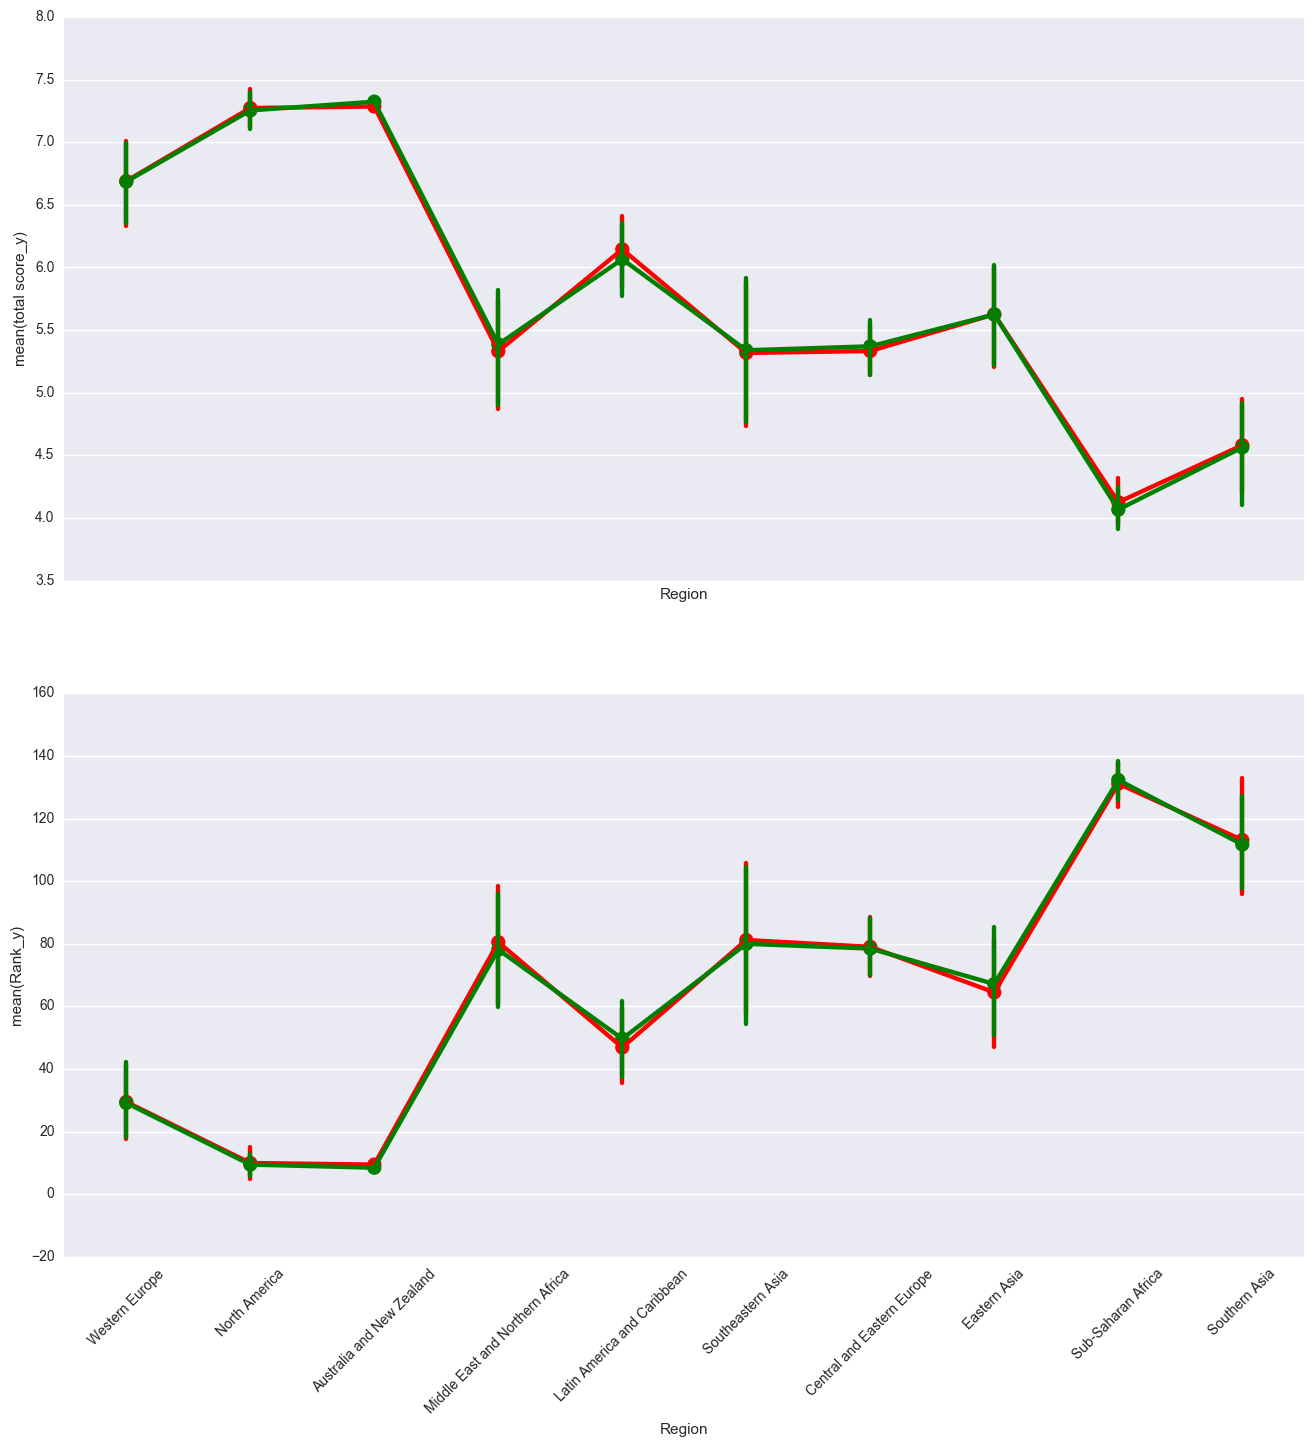

In [159]:
f, axes = plt.subplots(2, 1, figsize=(16, 16), sharex=True)
axes = axes.flatten()
# The change of the mean
sns.pointplot(x="Region", y="total score_x", data=data5, color='r', ax = axes[0])
sns.pointplot(x="Region", y="total score_y", data=data5, color='g',ax = axes[0])

sns.pointplot(x="Region", y="Rank_x", data=data5, color='r',ax = axes[1])
sns.pointplot(x="Region", y="Rank_y", data=data5, color='g',ax = axes[1])
plt.xticks(rotation=45)

In [140]:
increase = data5[data5.change>0]
neutral = data5[data5.change==0]
decrese = data5[data5.change<0]

increase['Trend'] = 'increase'
neutral['Trend'] = 'neutral'
decrese['Trend'] = 'decrese'

data7 = pd.concat([increase,neutral,decrese],axis=0)
# data7

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

In [142]:
data7.head()

,Country,Region,Rank_x,total score_x,Rank_y,total score_y,change,Trend
0,Switzerland,Western Europe,1,7.58696,2,7.50866,1,increase
1,Iceland,Western Europe,2,7.56092,3,7.50139,1,increase
4,Canada,North America,5,7.42694,6,7.40403,1,increase
7,Sweden,Western Europe,8,7.36370,10,7.29139,2,increase
11,Costa Rica,Latin America and Caribbean,12,7.22577,14,7.08670,2,increase


# Plotting “wide-form” data
- While using “long-form” or “tidy” data is preferred, these functions can also by applied to “wide-form” data in a variety of formats, including pandas DataFrames or two-dimensional numpy arrays. These objects should be passed directly to the data parameter:

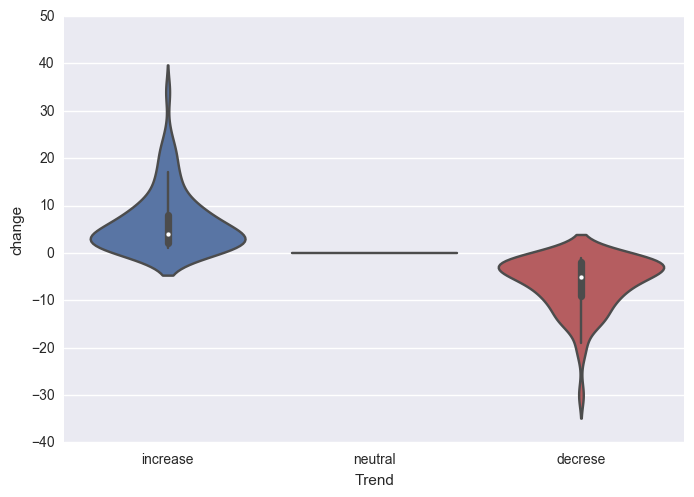

In [163]:
# Additionally, these functions accept vectors of Pandas or numpy objects rather than variables in a
sns.violinplot(x=data7.Trend, y=data7.change);

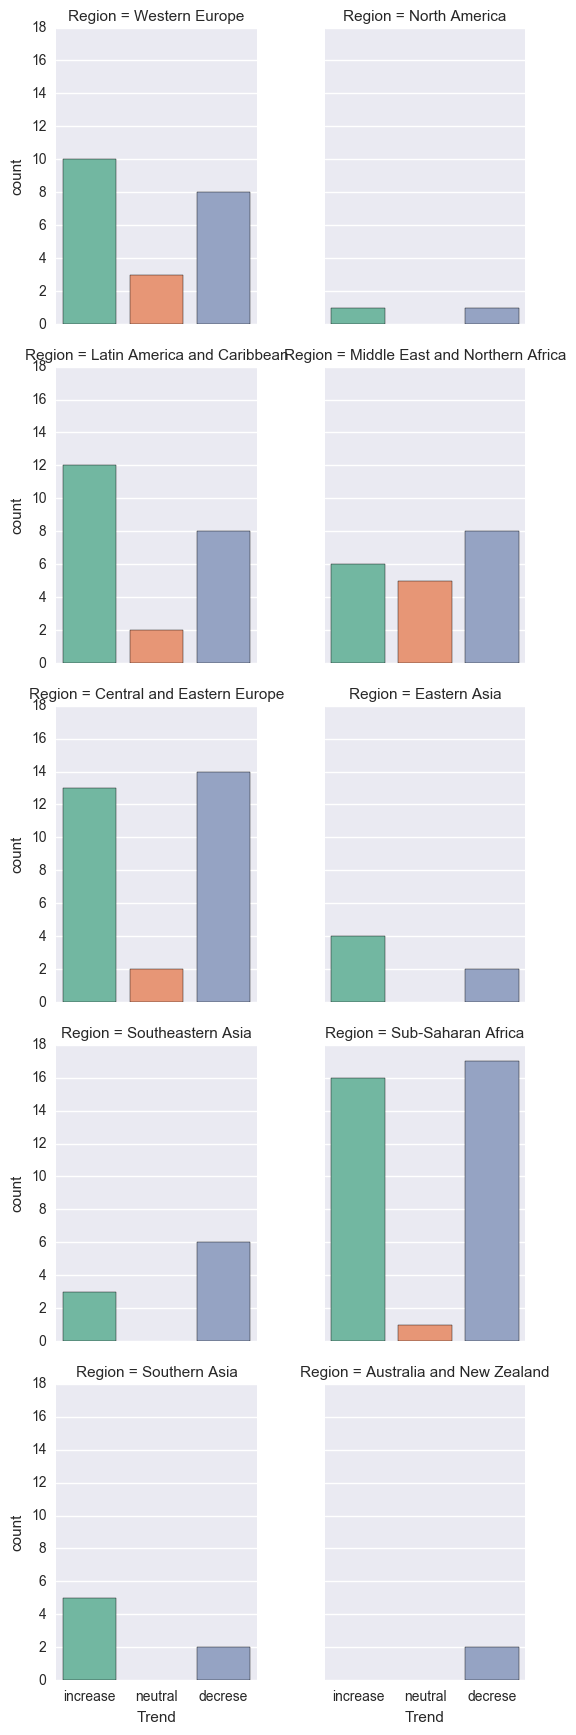

In [184]:
g = sns.factorplot("Trend", col="Region", col_wrap=2,
                 data=data7[data7.Region.notnull()],
                 kind="count", size=3.5, aspect=.8, palette="Set2")

In [101]:
# sns.countplot(y="Region", hue = "change", data = data5, palette="Greens_d")
# plt.savefig('2-3.png')

In [ ]:
# Analyse the value-counts of the change from 2015-2016

In [69]:
y = pd.DataFrame(data5['change'].value_counts().index)

In [70]:
x = pd.DataFrame(data5['change'].value_counts().values)

In [71]:
changevalue = pd.concat([y,x],axis=1)

In [74]:
changevalue.columns = ['change', 'values']

In [85]:
changevalue.head()

,change,values
0,1,14
1,0,13
2,-2,11
3,-1,10
4,2,9


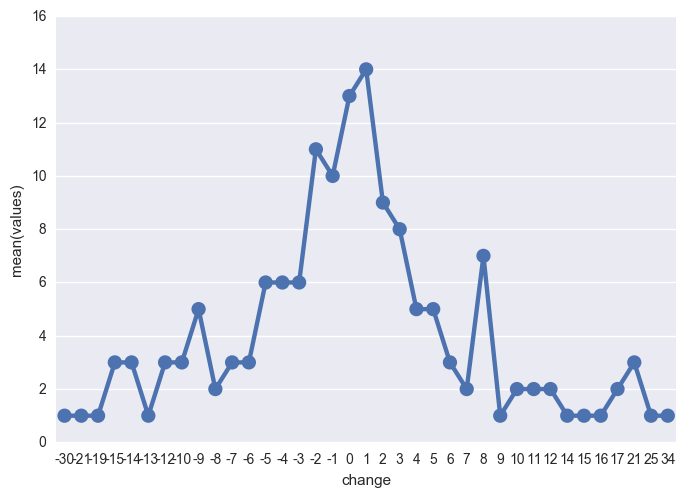

In [155]:
ax= sns.pointplot(x="change", y="values", data=changevalue)